**Prática de Histogramas**

1) 
- Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’
- Com a imagem negativa, produza a imagem original novamente. 
- Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
- Aplique a imagem uma função logarítmica.


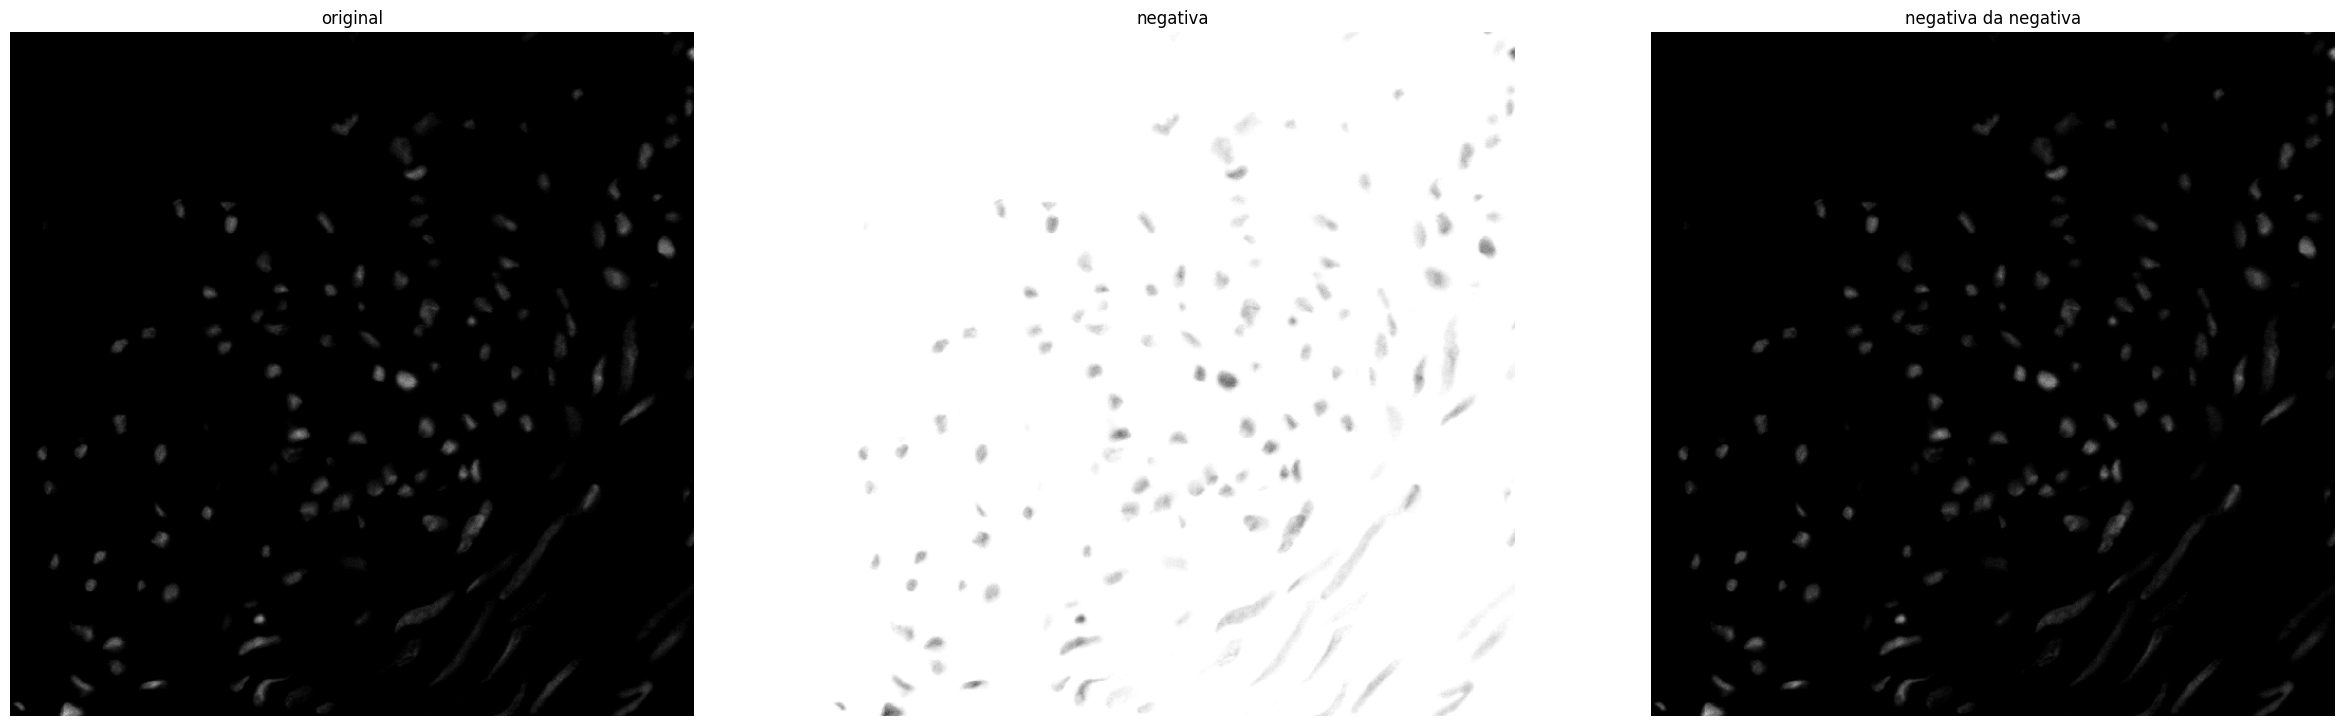

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2


img = cv2.imread("im_cells.png")
img_negative = 255 - img
negative_negative = 255 - img_negative

plt.figure(figsize=(30,30))

plt.subplot(1,3,1)
plt.axis("off")
plt.title("original")
plt.imshow(img)

plt.subplot(1,3,2)
plt.axis("off")
plt.title("negativa")
plt.imshow(img_negative)

plt.subplot(1,3,3)
plt.axis("off")
plt.title("negativa da negativa")
plt.imshow(negative_negative)

plt.show()


#### Resposta
Os objetos são melhor percebidos na imagem negativa, já que os detalhes pretos no branco são mais aparentes

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


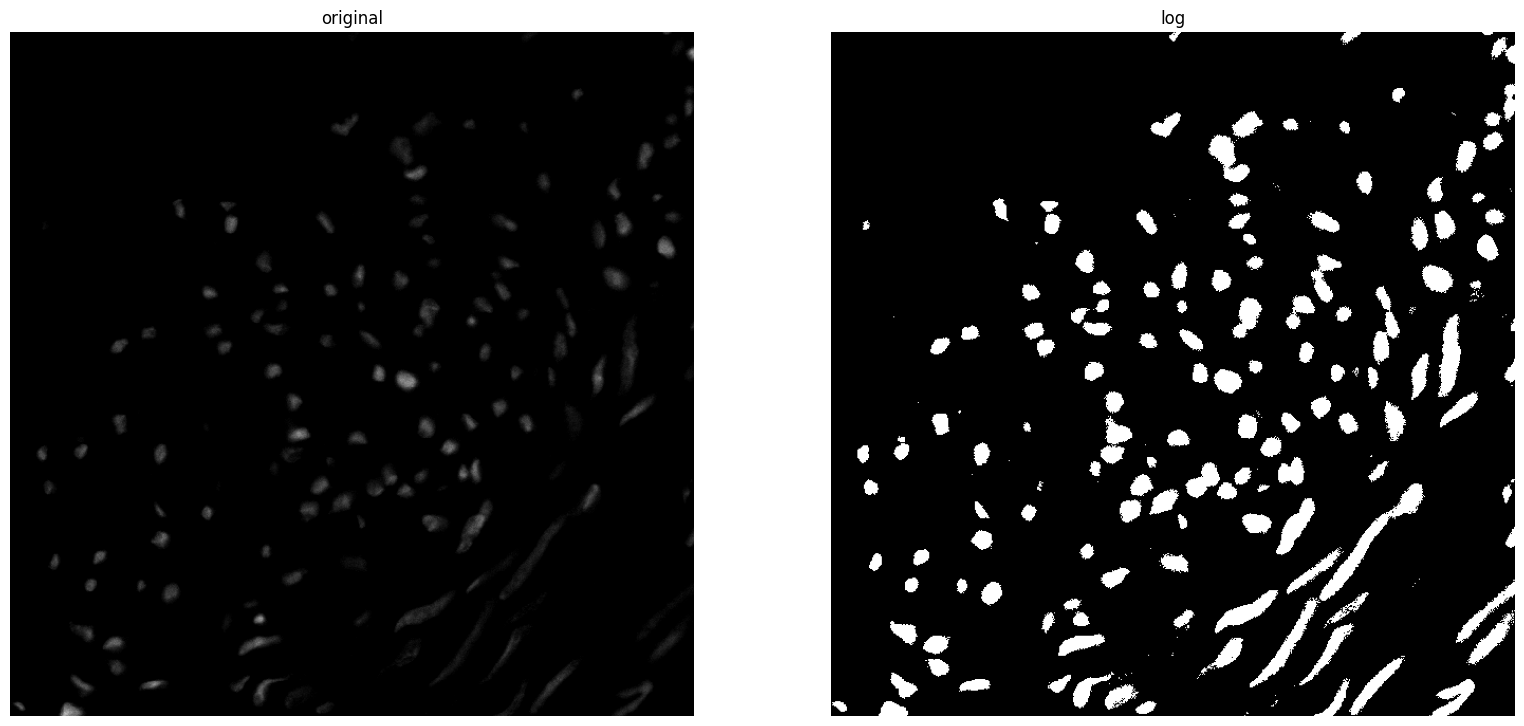

In [135]:
#Função Logarítmica
img_normalized = img / np.max(img)
log_img = np.log1p(img_normalized)
log_img = (log_img / np.max(log_img)) * 255

plt.figure(figsize=(30,30))
plt.subplot(1,3,1)
plt.axis("off")
plt.title("original")
plt.imshow(img)

plt.subplot(1,3,2)
plt.axis("off")
plt.title("log")
plt.imshow(log_img)

2)
- Abra a imagem 'pout.tif' e mostre seu histograma.
- Equalize a imagem anterior e mostre novamente seu histograma. Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html)
(procurar função OpenCV)



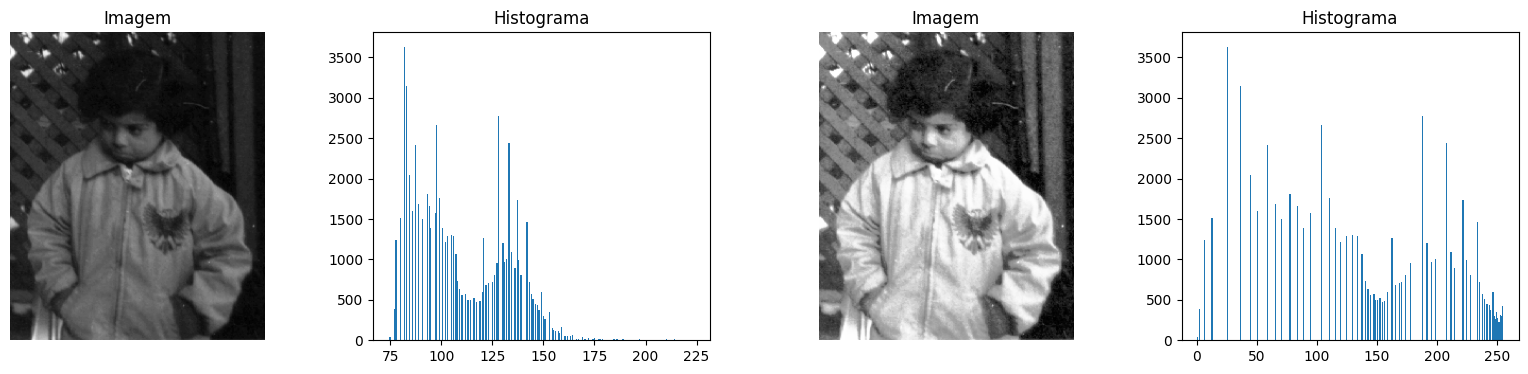

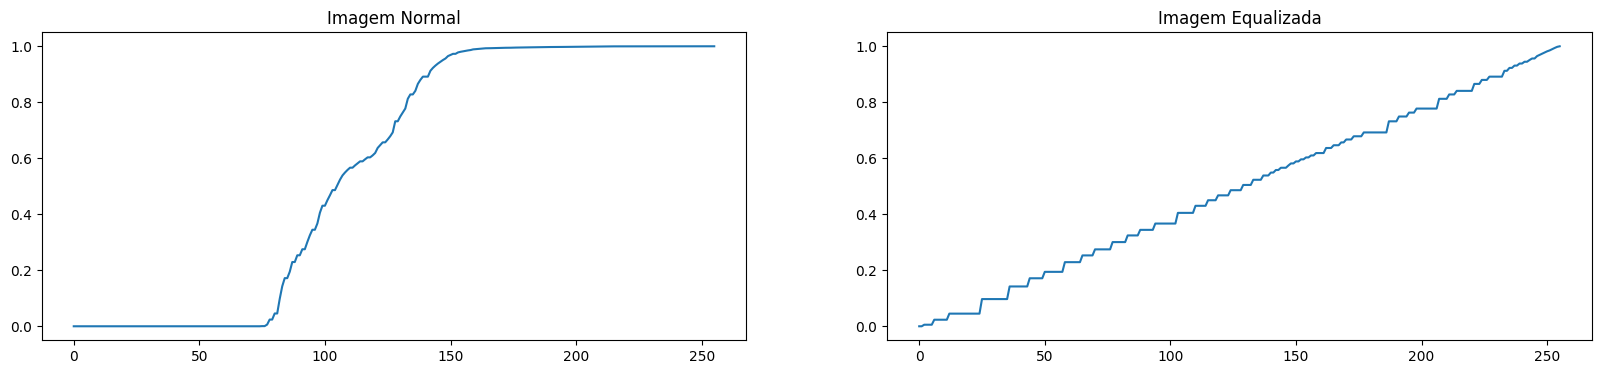

In [136]:
img = cv2.imread("pout.tif")

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#imagem normal
plt.figure(figsize=(20, 4))
plt.subplot(1, 4, 1)
plt.imshow(img_gray, cmap='gray')	
plt.axis("off")
plt.title('Imagem')

plt.subplot(1, 4, 2)
plt.hist(img_gray.ravel(), bins=255) #ravel faz todos elementos da imagem virarem um único array
plt.title('Histograma')


#imagem equalizada
img_eq = cv2.equalizeHist(img_gray)

plt.subplot(1, 4, 3)
plt.imshow(img_eq,  cmap='gray')
plt.axis("off")
plt.title('Imagem')

plt.subplot(1, 4, 4)
plt.hist(img_eq.ravel(), bins=255)
plt.title('Histograma')

plt.show()

def cdf(img, bin_size=1):
    if img.shape :
        if img.ndim > 2:
            new_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        else:
            new_img = np.array(img)

    number_of_pixels = new_img.shape[0] * new_img.shape[1]
    num_bins = int(256 / bin_size)

    hist = np.zeros(num_bins)

    for i in range(num_bins):
        lower_bound = i * bin_size
        upper_bound = (i + 1) * bin_size
        hist[i] = np.sum((new_img >= lower_bound) & (new_img < upper_bound))
    
    hist = hist / number_of_pixels

    cdf = np.cumsum(hist)

    return cdf

def transform_curve_image(img, title):
    plt.plot(cdf(img))
    plt.title(title)

plt.figure(figsize=(20, 4))
plt.subplot(1,2,1)
transform_curve_image(img_gray, "Imagem Normal")
plt.subplot(1,2,2)
transform_curve_image(img_eq, "Imagem Equalizada")
plt.show()


3) *Implemente* o algoritmo de equalização de histograma e aplique a imagem ‘im_cells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
- Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

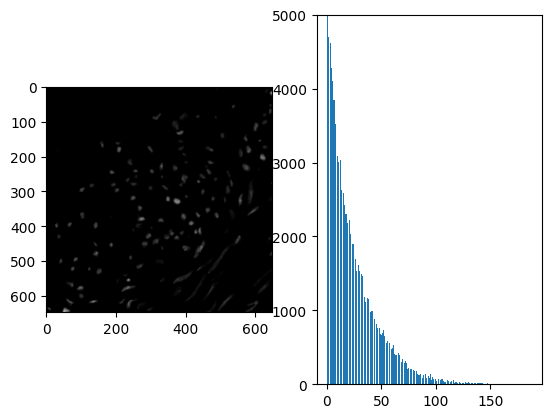

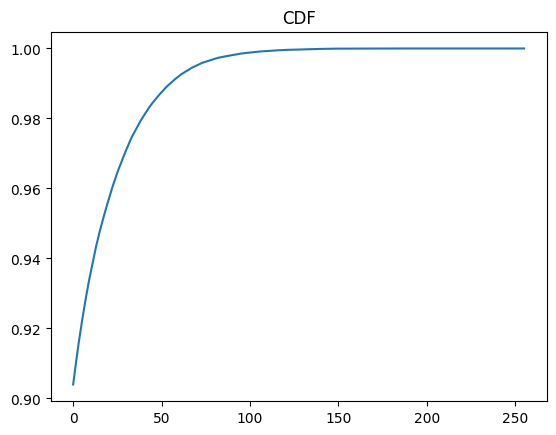

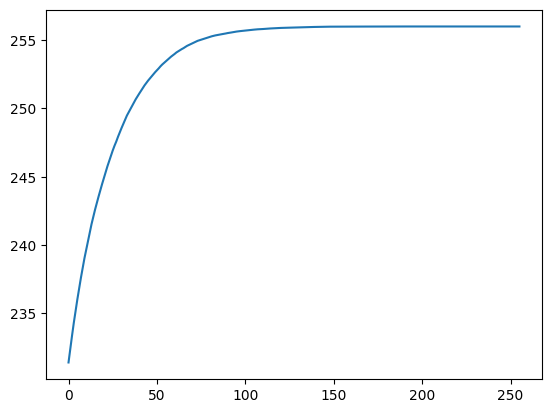

In [150]:
img_3 = cv2.imread("im_cells.png")

#antes de equalizar
plt.subplot(1,2,1)
plt.imshow(img_3, cmap='gray')
plt.subplot(1,2,2)
plt.hist(img_3.ravel(), bins=255)
plt.ylim(0, 5000)
plt.show()

#algoritmo de equalização
# Tr(rk) = numero_de_divisoes * cdf

#calcular valores do cdf

cdf_values = cdf(img_3, 1)
plt.plot(cdf_values)
plt.title("CDF")
plt.show()

#pegar os valores do cdf e comparar com a porcentagem que deveria ser do numero_de_divisoes
number_of_bins = cdf_values.size

intensities = []
for i in range(number_of_bins):
    intensities.append(round((i/cdf_values.size)/ 0.01) * 0.01)

real_values = np.zeros(number_of_bins)

for i in range(number_of_bins):
    if cdf_values[i] != intensities[i]:
        real_values[i] = cdf_values[i] * number_of_bins
real_values
plt.plot(real_values)
plt.show()

#caso seja diferente do valor desejado, entao multiplicar pelo numero_de_divisoes, pegando o resultado e colocando os pixel nesse valor arredondado